In [4]:
!pip install -U scikit-learn scipy matplotlib


     |████████████████████████████████| 7.3 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 297 kB/s eta 0:00:01
     |████████████████████████████████| 303 kB 1.1 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.1
    Uninstalling scipy-1.6.1:
      Successfully uninstalled scipy-1.6.1


In [6]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from plotly.offline import plot, iplot,init_notebook_mode

In [1]:
data = pd.read_csv('garments_worker_productivity.csv')
data.head()

NameError: name 'pd' is not defined

In [14]:
# Separate features (x) from target (y)
X, y = np.hsplit(data, 2)





In [13]:
# Number of examples
m = y.size

In [15]:
# Fit a linear regression model (without regularization)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
# Obtain coefficients theta0 and theta1 from model
theta0, theta1 = model.intercept_, model.coef_[0]
theta0, theta1

(array([-3.89578088]), array([1.19303364]))

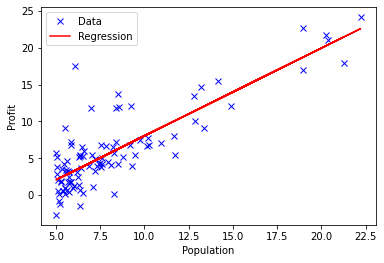

In [16]:
# Plot data and regression line
plt.plot(X, y, 'bx', label='Data')
plt.plot(X, model.predict(X), 'r-', label='Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()



In [18]:
# Training mean squared error
np.mean((model.predict(X) - y) ** 2)



8.953942751950358

In [19]:
# Training score
model.score(X, y)

0.7020315537841397

In [20]:
# Predict profit for populations of 35.000 and 70.000 
model.predict(np.array([[3.5], [7.0]])) * 10000

array([[ 2798.36876352],
       [44554.54631015]])

In [21]:
# predict profit for pop of 70000 and 100000
model.predict(np.array([[7.0], [10.0]])) * 10000

array([[44554.54631015],
       [80345.55563584]])

In [22]:
# LinearRegression above internally added a column vector of 1s.
# For the following calculations, this must be done explicitly.
X = np.c_[np.ones(m), X]

In [27]:
# Compute least-squares solution with np.linalg.lstsq. 
# This is what LinearRegression actually does under the hood.
# Rcond parameter will change to the default of machine precision times.
Theta = np.linalg.lstsq(X, y, rcond=None)[0]
Theta

array([[-3.89578088],
       [ 1.19303364]])

In [28]:
# Solve normal equation (explicit pseudo-inverse)
Theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
Theta


array([[-3.89578088],
       [ 1.19303364]])